In [1]:
import pandas as pd 
df = pd.read_csv("cardio_train.csv",sep=";")

# Data Analysis

In [2]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). 

0 - absence of HD
1 - presence of HD
0    35004
1    34972
Name: cardio, dtype: int64


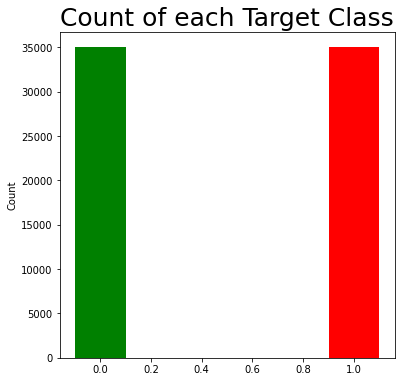

In [11]:
from matplotlib import pyplot as plt
print("0 - absence of HD")
print("1 - presence of HD")
print(df.cardio.value_counts())
# 0 - absence of HD
# 1 - presence of HD
plt.figure(figsize=(6, 6))
plt.bar(df['cardio'].unique(), df['cardio'].value_counts(), color = ['green', 'red'],width=0.2)
plt.ylabel('Count')
plt.title('Count of each Target Class', size = 25)
plt.show()

id: An identifier for each individual in the dataset.
age: The age of the individual (in days).
gender: Gender (1 for female, 2 for male).
height: Height in centimeters.
weight: Weight in kilograms.
ap_hi: Systolic blood pressure (measured in mmHg).
ap_lo: Diastolic blood pressure (measured in mmHg).
cholesterol: Cholesterol level (1, 2, or 3).
gluc: Glucose level (1, 2, or 3).
smoke: Whether the individual smokes (0 for no, 1 for yes).
alco: Whether the individual consumes alcohol (0 for no, 1 for yes).
active: Whether the individual is physically active (0 for no, 1 for yes).
cardio: Presence of cardiovascular disease (0 for no, 1 for yes)."

# preprocessing

In [4]:
df.drop(columns=['id'], inplace=True)

In [5]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
pip install --upgrade matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\meesala ramya\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:


In [6]:
print(df.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
df.duplicated().sum()

24

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [13]:
pip install --upgrade numpy seaborn


  Using cached matplotlib-3.8.3-cp39-cp39-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\MEESALA RAMYA\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



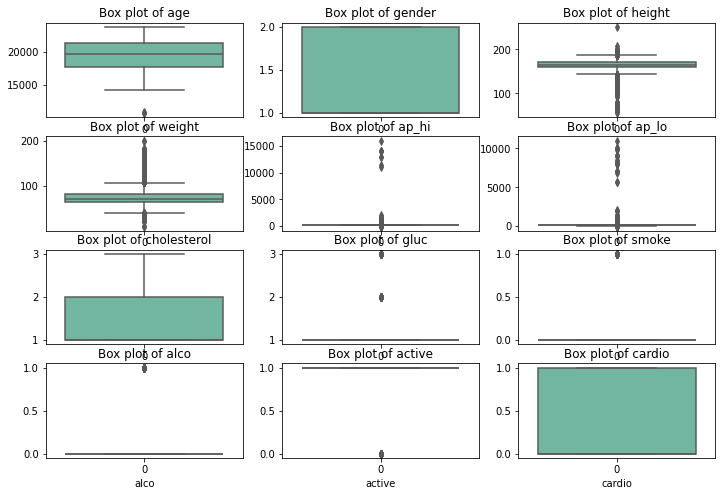

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = 3 
# Calculate the number of rows needed
num_rows = (len(df.columns) + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array
axes = axes.flatten()

# Iterate through each feature and create a box plot
for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column], ax=axes[i], orient="v", palette="Set2")
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel(column)

# Show the plot
plt.show()


In [12]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60118

checking How many cases where diastolic pressure is higher than systolic

In [13]:
df[df['ap_lo']> df['ap_hi']].shape[0]

0

Transformation: Converting age from days to years

In [14]:
df['age'] = (df['age'] / 365).round().astype('int')
print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


Categorizing features

In [15]:
# Defining bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]
#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7))
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


Attribute combination

In [16]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,23.011177


In [17]:

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6))
df["bmi"].value_counts(normalize=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1


In [18]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3
mapMin = int(df['map'].min())
mapMax = int(df['map'].max())
print(mapMin, mapMax)
df['map'] = pd.cut(df['map'], bins=6, labels=range(6))
df.head()

73 121


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


Dropping features We only need categorical data

In [19]:
df=df.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,2
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,2
3,2,1,1,0,0,1,1,3,2,5
4,1,1,1,0,0,0,0,3,1,0


Label Encoding

In [20]:
from sklearn import metrics, preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head(10)

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,1,0,0,0,0,1,0,3,1,2
1,0,2,0,0,0,1,1,4,3,4
2,0,2,0,0,0,0,1,4,1,2
3,1,0,0,0,0,1,1,3,2,5
4,0,0,0,0,0,0,0,3,1,0
5,0,1,1,0,0,0,0,5,2,2
6,0,2,0,0,0,1,0,6,4,2
7,1,2,2,0,0,1,1,6,2,3
8,0,0,0,0,0,1,0,3,2,1
9,0,0,0,0,0,0,0,4,1,0


In [22]:
print(df.columns)


Index(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'age_group', 'bmi', 'map'],
      dtype='object')


In [23]:
pip install kmodes


  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\MEESALA RAMYA\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [24]:
pip install --user kmodes


  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# clustering

Clustering is used in machine learning to find similarities between data by grouping. The most common technique for clustering is K-means. However, it is not effective for categorical data. K-means uses a Euclidean distance measure differences between data points. For our data, we have used K-modes which is the appropriate clustering algorithm for categorical data because it uses mode-based distance between the categories, so it is more suitable for categorical data. To find the optimal number of clusters, we have utilized the elbow curve method.

In [24]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

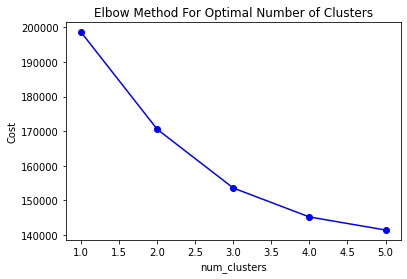

In [25]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Building KModes model

In [26]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
print(clusters)

[1 0 0 ... 0 0 1]


In [27]:
df.insert(0,"clusters",clusters,True)

# Correlation Matrix¶

In [91]:
pip install --upgrade seaborn matplotlib


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 655.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 722.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 807.1 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 807.1 kB/s eta 0:00:01
   ----------------------------- -------- 225.3/294.9 kB 655.6 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/294.9 kB 710.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 701.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.6 MB 2.6 MB/s eta 0:00:03
    --------------------------------------- 0.1/7.6 MB 1.2 MB/s eta 0:00

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\nitya\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [28]:
import matplotlib.pyplot as plt
matrix = df.corr()
rounded_matrix = matrix.round(2)
# Print the rounded correlation matrix
print(rounded_matrix)

             clusters  gender  cholesterol  gluc  smoke  alco  active  cardio  \
clusters         1.00    0.01        -0.17 -0.07   0.02  0.00    0.02   -0.72   
gender           0.01    1.00        -0.04 -0.02   0.34  0.17    0.01   -0.00   
cholesterol     -0.17   -0.04         1.00  0.45   0.00  0.03    0.01    0.22   
gluc            -0.07   -0.02         0.45  1.00  -0.01  0.00   -0.01    0.09   
smoke            0.02    0.34         0.00 -0.01   1.00  0.34    0.03   -0.02   
alco             0.00    0.17         0.03  0.00   0.34  1.00    0.03   -0.01   
active           0.02    0.01         0.01 -0.01   0.03  0.03    1.00   -0.04   
cardio          -0.72   -0.00         0.22  0.09  -0.02 -0.01   -0.04    1.00   
age_group       -0.19   -0.02         0.15  0.10  -0.04 -0.03   -0.01    0.23   
bmi             -0.29   -0.14         0.16  0.10  -0.04  0.01   -0.01    0.16   
map             -0.32    0.05         0.18  0.07   0.02  0.03    0.00    0.40   

             age_group   bm

# Split Data¶
Training set: 80%

Test set: 20%

According to the correlation table, gender has 0 correlation with our target. Moreover, ‘alco’ has 0.01 correlation. Therefore, we dropped those two features and saw an increase in the performance of our models.

In [29]:
x = df.drop(['cardio','gender','alco','smoke','active'], axis=1)
y = df['cardio']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [31]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=3):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Training Precision scores": results['train_precision'],
              "Training Recall scores": results['train_recall'],
              "Training F1 scores": results['train_f1'],
              "Validation Accuracy scores": results['test_accuracy'],
              "Validation Precision scores": results['test_precision'],
              "Validation Recall scores": results['test_recall'],
              "Validation F1 scores": results['test_f1']
              }

# Random Forest

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier()
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}
rf_gridsearch = GridSearchCV(estimator=rf_model,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(x_train, y_train)
rf_result=cross_validation(rf_gridsearch, x_train, y_train, 3)
print(rf_result)
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")
# Make prediction using best estimator

y_pred_rf = best_estimator.predict(x_test)
rf_accuracy= round(accuracy_score(y_test, y_pred_rf)*100,2)
precision_rf= round(precision_score(y_test,y_pred_rf)*100,2)
recall_rf = round(recall_score(y_test,y_pred_rf )*100,2)
f1_rf = round(f1_score(y_test,y_pred_rf)*100,2)
print("The accuracy score achieved using random forest is: "+str(rf_accuracy)+" %")
print("The precision score achieved using random forest is: "+str(precision_rf)+" %")
print("The recall score achieved using random forest is: "+str(recall_rf)+" %")
print("The f1 score achieved using random forest is: "+str(f1_rf)+" %")
print()
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

{'Training Accuracy scores': array([0.90552679, 0.90531142, 0.90771294]), 'Training Precision scores': array([0.91272893, 0.91562151, 0.9142058 ]), 'Training Recall scores': array([0.89231553, 0.88843581, 0.89550812]), 'Training F1 scores': array([0.9024068 , 0.90182383, 0.90476037]), 'Validation Accuracy scores': array([0.90662425, 0.90661843, 0.90175285]), 'Validation Precision scores': array([0.91288519, 0.91298127, 0.91219769]), 'Validation Recall scores': array([0.89462283, 0.89448197, 0.88441443]), 'Validation F1 scores': array([0.90366175, 0.90363695, 0.89809123])}
Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10)
The accuracy score achieved using random forest is: 90.27 %
The precision score achieved using random forest is: 90.97 %
The recall score achieved using random forest is: 88.68 %
The f1 score achiev

In [30]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [33]:
import joblib
filename="rf_gridsearch.pkl"
with open('rf_gridsearch.pkl', 'wb') as f:
    joblib.dump(rf_gridsearch , f)
print("rf_gridsearch model saved to",filename)

rf_gridsearch model saved to rf_gridsearch.pkl


# svm

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf',random_state=42,probability=True)
# Train the SVM model on the training data
svm_classifier.fit(X_train_scaled, y_train)
svm_result = cross_validation(svm_classifier, x_train, y_train, 3)
print(svm_result)
# Make predictions on the test data
Y_pred_svm = svm_classifier.predict(X_test_scaled)
# Evaluate the performance of the SVM model
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
precision_svm = round(precision_score(y_test,Y_pred_svm,zero_division=1)*100,2)
recall_svm = round(recall_score(y_test,Y_pred_svm)*100,2)
f1_svm = round(f1_score(y_test,Y_pred_svm)*100,2)
print("The accuracy score achieved using Support Vector Machine is: "+str(score_svm)+" %")
print("The precision score achieved using Support Vector Machine is: "+str(precision_svm)+" %")
print("The recall score achieved using Support Vector Machine is: "+str(recall_svm)+" %")
print("The f1 score achieved using Support Vector Machine is: "+str(f1_svm)+" %")
print()
conf_matrix = confusion_matrix(y_test, Y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)


{'Training Accuracy scores': array([0.90262616, 0.90247326, 0.90524904]), 'Training Precision scores': array([0.90460865, 0.91527888, 0.91102163]), 'Training Recall scores': array([0.89550147, 0.88244664, 0.89372412]), 'Training F1 scores': array([0.90003202, 0.89856295, 0.90228998]), 'Validation Accuracy scores': array([0.90469062, 0.90505895, 0.90031813]), 'Validation Precision scores': array([0.90721649, 0.91258969, 0.91020087]), 'Validation Recall scores': array([0.89704383, 0.89142347, 0.88352237]), 'Validation F1 scores': array([0.90210149, 0.90188241, 0.89666322])}
The accuracy score achieved using Support Vector Machine is: 90.06 %
The precision score achieved using Support Vector Machine is: 90.77 %
The recall score achieved using Support Vector Machine is: 88.44 %
The f1 score achieved using Support Vector Machine is: 89.59 %

Confusion Matrix:
[[5687  523]
 [ 672 5142]]


In [35]:
import joblib
filename="svm_classifier.pkl"
with open('svm_classifier.pkl', 'wb') as f:
      joblib.dump(svm_classifier, f)
print("svm_classifier model saved to",filename)

svm_classifier model saved to svm_classifier.pkl


# Naive Bayes

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0,-10, num=10)
}
nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, n_jobs=-1)
nb.fit(x_train, y_train)
nb_result = cross_validation(nb, x_train, y_train, 5)
print(nb_result)
Y_pred_nb = nb.predict(x_test)
score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)
precision_nb = round(precision_score(y_test,Y_pred_nb,zero_division=1)*100,2)
recall_nb = round(recall_score(y_test,Y_pred_nb,zero_division=1)*100,2)
f1_nb = round(f1_score(y_test,Y_pred_nb,zero_division=1)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
print("The precision score achieved using Naive Bayes is: "+str(precision_nb)+" %")
print("The recall score achieved using Naive Bayes is: "+str(recall_nb)+" %")
print("The f1 score achieved using Naive Bayes is: "+str(f1_nb)+" %")
print()
conf_matrix = confusion_matrix(y_test, Y_pred_nb)
print('Confusion Matrix:')
print(conf_matrix)


{'Training Accuracy scores': array([0.84465237, 0.84678363, 0.84662768, 0.85063028, 0.84569602]), 'Training Precision scores': array([0.76297811, 0.76537184, 0.76493485, 0.77059553, 0.76381786]), 'Training Recall scores': array([0.99028353, 0.99070829, 0.99129188, 0.98938034, 0.99129234]), 'Training F1 scores': array([0.86189607, 0.86358272, 0.86352598, 0.86638923, 0.86281397]), 'Validation Accuracy scores': array([0.85279135, 0.84426656, 0.84489032, 0.84333091, 0.84861718]), 'Validation Precision scores': array([0.77152755, 0.76191253, 0.7636453 , 0.76143044, 0.76813984]), 'Validation Recall scores': array([0.99341546, 0.99171623, 0.98938203, 0.99023147, 0.98937978]), 'Validation F1 scores': array([0.86852368, 0.86175711, 0.86197965, 0.86088803, 0.86483476])}
The accuracy score achieved using Naive Bayes is: 84.36 %
The precision score achieved using Naive Bayes is: 75.93 %
The recall score achieved using Naive Bayes is: 99.07 %
The f1 score achieved using Naive Bayes is: 85.97 %

Con

In [37]:
import joblib
filename="nb.pkl"
with open('nb.pkl', 'wb') as f:
    joblib.dump(nb, f)
print("naive bayes model saved to",filename)

naive bayes model saved to nb.pkl


# Logistic Regression

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Perform Min-Max scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize Logistic Regression model
logreg_model = LogisticRegression()

# Fit the model
logreg_model.fit(x_train_scaled, y_train)
logreg_result = cross_val_score(logreg_model, x_train, y_train, cv=3, scoring='accuracy')
print("Cross-validation results:", logreg_result)

# Make predictions on the test set
Y_pred_lr= logreg_model.predict(x_test_scaled)

# Evaluate the model
accuracy_lg= round(accuracy_score(y_test, Y_pred_lr)*100,2)
precision_lg= round(precision_score(y_test, Y_pred_lr) * 100, 2)
recall_lg= round(recall_score(y_test, Y_pred_lr) * 100, 2)
f1_lg= round(f1_score(y_test, Y_pred_lr) * 100, 2)

print("The accuracy score achieved using XGBoost is:", accuracy_lg, "%")
print("The precision score achieved using XGBoost is:", precision_lg, "%")
print("The recall score achieved using XGBoost is:", recall_lg, "%")
print("The f1 score achieved using XGBoost is:", f1_lg, "%")
conf_matrix = confusion_matrix(y_test, Y_pred_lr)
print('Confusion Matrix:')
print(conf_matrix)


Cross-validation results: [0.84961327 0.84854345 0.84985341]
The accuracy score achieved using XGBoost is: 84.5 %
The precision score achieved using XGBoost is: 77.98 %
The recall score achieved using XGBoost is: 94.67 %
The f1 score achieved using XGBoost is: 85.52 %
Confusion Matrix:
[[4656 1554]
 [ 310 5504]]


In [39]:
import joblib
filename="logreg_model.pkl"
with open('logreg_model.pkl', 'wb') as f:
    joblib.dump(logreg_model, f)
print("logistic regression model saved to",filename)

logistic regression model saved to logreg_model.pkl


# XG Boosting

In [42]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [40]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np
# Set XGBoost parameters 
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth=1)

# Train the model
xgb_model.fit(x_train, y_train)

# Perform cross-validation
xgb_result = cross_val_score(xgb_model, x_train, y_train, cv=3, scoring='accuracy')
print("Cross-validation results:", xgb_result)
print("Mean cross-validation accuracy:", np.mean(xgb_result))

# Evaluate on test set
Y_pred_xgb = xgb_model.predict(x_test)
score_xgb = round(accuracy_score(Y_pred_xgb, y_test) * 100, 2)
precision_xgb = round(precision_score(y_test, Y_pred_xgb) * 100, 2)
recall_xgb = round(recall_score(y_test, Y_pred_xgb) * 100, 2)
f1_xgb = round(f1_score(y_test, Y_pred_xgb) * 100, 2)

print("The accuracy score achieved using XGBoost is:", score_xgb, "%")
print("The precision score achieved using XGBoost is:", precision_xgb, "%")
print("The recall score achieved using XGBoost is:", recall_xgb, "%")
print("The f1 score achieved using XGBoost is:", f1_xgb, "%")
conf_matrix = confusion_matrix(y_test, Y_pred_xgb)
print('Confusion Matrix:')
print(conf_matrix)


Cross-validation results: [0.9064995  0.90624415 0.90181523]
Mean cross-validation accuracy: 0.9048529619798932
The accuracy score achieved using XGBoost is: 90.31 %
The precision score achieved using XGBoost is: 91.43 %
The recall score achieved using XGBoost is: 88.24 %
The f1 score achieved using XGBoost is: 89.8 %
Confusion Matrix:
[[5729  481]
 [ 684 5130]]


In [41]:
import joblib
filename="xgb_model.pkl"
with open('xgb_model.pkl', 'wb') as f:
    joblib.dump(xgb_model, f)
print("xgb model saved to",filename)

xgb model saved to xgb_model.pkl


# visualization

The accuracy score achieved using Naive Bayes is: 84.36 %
The accuracy score achieved using Support Vector Machine is: 90.06 %
The accuracy score achieved using random forest is: 90.27 %
The accuracy score achieved using logistic regression is: 84.5 %
The accuracy score achieved using XGBoost is: 90.31 %


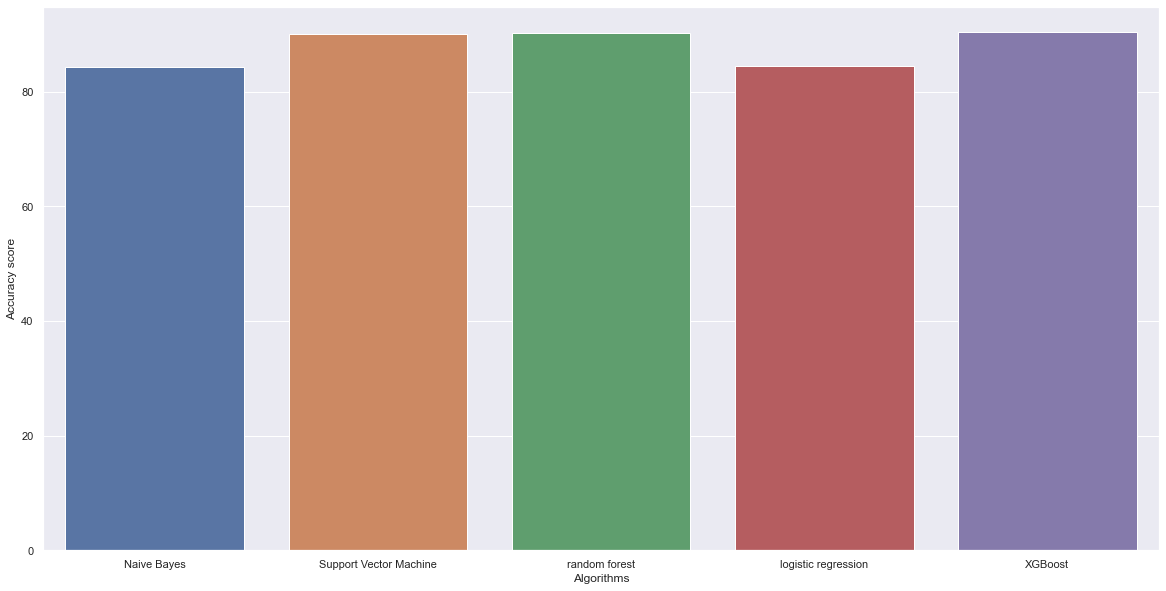

In [42]:
import seaborn as sns
acc_scores = [score_nb,score_svm,rf_accuracy,accuracy_lg,score_xgb]
algorithms = ["Naive Bayes","Support Vector Machine","random forest","logistic regression","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(acc_scores[i])+" %")

sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=acc_scores)
plt.show()

print()

In [43]:


# Define accuracy scores and algorithms
acc_scores = [score_nb, score_svm, rf_accuracy, accuracy_lg, score_xgb]
algorithms = ["Naive Bayes", "Support Vector Machine", "random forest", "logistic regression", "XGBoost"]
models = list(zip(algorithms, acc_scores))

# Sort the models based on accuracy scores in descending order
models_sorted = sorted(models,key=lambda x: x[1], reverse=True)

# Select the top three models
top_three_models = models_sorted[:3]
print(top_three_models)
# Print the top three models
print("Top three models:")
for model, accuracy in top_three_models:
    print(f"The accuracy score achieved using {model} is: {accuracy:.2f}%")


[('XGBoost', 90.31), ('random forest', 90.27), ('Support Vector Machine', 90.06)]
Top three models:
The accuracy score achieved using XGBoost is: 90.31%
The accuracy score achieved using random forest is: 90.27%
The accuracy score achieved using Support Vector Machine is: 90.06%


# Hard Voting

In [44]:
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import VotingClassifier
import pickle
with open("svm_classifier.pkl", "rb") as f:
    loaded_svm_model = joblib.load(f)

with open("rf_gridsearch.pkl", "rb") as f:
    loaded_rf_model = joblib.load(f)

with open("xgb_model.pkl", "rb") as f:
    loaded_xgb_model = joblib.load(f)
estimators=[('rf',loaded_rf_model),('svm',loaded_svm_model),('xgb',loaded_xgb_model)]
#create our voting classifier, inputing our models
ensemble = VotingClassifier(estimators, voting='hard')
# Train the model
ensemble.fit(x_train, y_train)
ensemble.score(x_test, y_test)
# Make predictions on the test data
y_pred_hv = ensemble.predict(x_test)
CM_hv=confusion_matrix(y_test,y_pred_hv)
print(CM_hv)
TN = CM_hv[0][0]
FN = CM_hv[1][0]
TP = CM_hv[1][1]
FP = CM_hv[0][1]
specificity = TN/(TN+FP)
acc_hv= accuracy_score(y_test, y_pred_hv)
prec_hv = precision_score(y_test, y_pred_hv)
rec_hv = recall_score(y_test, y_pred_hv)
f1s_hv = f1_score(y_test, y_pred_hv)
score_hv= round(acc_hv*100,2)
precision_hv= round(prec_hv*100,2)
recall_hv = round(rec_hv*100,2)
f1_hv = round(f1s_hv*100,2)
model_results =pd.DataFrame([['Hard Voting',acc_hv, prec_hv,rec_hv,f1s_hv,specificity]],
               columns = ['Model', 'Accuracy','Precision', 'Recall', 'F1 Score','Specificity'])
model_results

[[5698  512]
 [ 658 5156]]


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Hard Voting,0.902695,0.909668,0.886825,0.898101,0.917552


In [45]:
hv_result = cross_validation(ensemble, x_train, y_train, 3)
print(hv_result)

{'Training Accuracy scores': array([0.90509014, 0.90478121, 0.90690204]), 'Training Precision scores': array([0.91173599, 0.91432879, 0.91271594]), 'Training Recall scores': array([0.89250669, 0.88875438, 0.89544441]), 'Training F1 scores': array([0.90201887, 0.90136021, 0.90399768]), 'Validation Accuracy scores': array([0.90656188, 0.90630653, 0.90175285]), 'Validation Precision scores': array([0.91265921, 0.91185252, 0.9116566 ]), 'Validation Recall scores': array([0.89475025, 0.89511915, 0.88505161]), 'Validation F1 scores': array([0.90361601, 0.90340836, 0.89815713])}


In [46]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.show()
plot_result

<function __main__.plot_result(x_label, y_label, plot_title, train_data, val_data)>

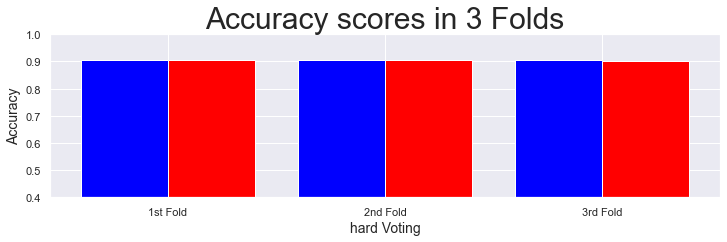

The accuracy score achieved using  is: 90.27 %


In [47]:
model_name = "hard Voting"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            hv_result["Training Accuracy scores"],
            hv_result["Validation Accuracy scores"])
print("The accuracy score achieved using  is: "+str(score_hv)+" %")


In [48]:
import pickle
import joblib

# Assuming your ensemble model is stored in a variable called 'ensemble_model'
# Save the model to a file
filename="ensemble.pkl"
with open('ensemble.pkl', 'wb') as f:
    joblib.dump(ensemble, f)
print("ensemble model saved to",filename)

ensemble model saved to ensemble.pkl


In [49]:
single_instance_prediction = ensemble.predict(np.array([[0,1,1,0,3,4]]))

print("Predicted class:", single_instance_prediction)

Predicted class: [1]


c:\Users\MEESALA RAMYA\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\MEESALA RAMYA\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [56]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\meesala ramya\anaconda3\lib\site-packages
Requires: numpy, scipy, joblib, threadpoolctl
Required-by: kmodes, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.
